## 生成数据
- cs: 各样品的化合物数据
- level: 样品气味等级

In [1]:
run gen_data.py

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
cs = cs.reset_index(drop=True)
cs.head()

,000066-25-1,000067-64-1,000068-12-2,000071-36-3,000071-43-2,000078-83-1,000078-87-5,000078-93-3,000079-01-6,000090-05-1,...,000105-46-4,001003-03-9,054774-91-3,1000401-12-0,1000338-85-1,001560-92-5,000057-10-3,000629-54-9,000301-02-0,000131-20-4
0,0.000000,0.000000,401.108756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.797467,0.000000,0.000000,0.000000,0.000000,0.000000,58.072099,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,35.783815,40.357139,269.434443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.546434,16.646600,0.000000,17.979392,0.000000,0.000000,0.000000,10.881342,0.000000,63.280306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,24.137012,20.378954,0.000000,0.000000,36.242135,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
levels

(5.0, 5.0, 4.0, 6.0, 5.0, 5.0, 4.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 3.0)

---

1.  PCA

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
cs = MinMaxScaler().fit_transform(cs) # 有预处理正对变量均一化
pca = PCA()
score = pca.fit_transform(cs)
score.shape

(15, 15)

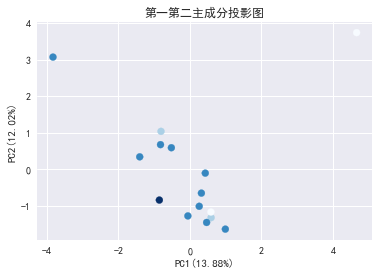

In [32]:
plt.scatter(score[:,0],score[:,1], c=levels, cmap=plt.cm.Blues)
plt.title('第一第二主成分投影图')
evr = pca.explained_variance_ratio_
plt.xlabel('PC1({}%)'.format(np.round(evr[0]*100, 2)))
plt.ylabel('PC2({}%)'.format(np.round(evr[1]*100, 2)))

2.PLSR

In [6]:
from sklearn.cross_decomposition import PLSRegression
plsr=PLSRegression(n_components=1)
plsr.fit(cs, levels)

PLSRegression(copy=True, max_iter=500, n_components=1, scale=True, tol=1e-06)

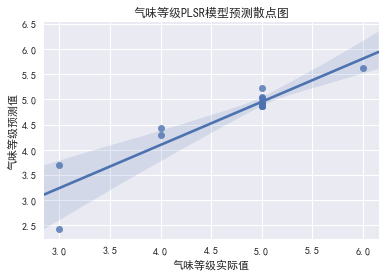

In [19]:
y_pred_plsr = plsr.predict(cs).flatten()
sns.regplot(np.asarray(levels),y_pred_plsr)
plt.title('气味等级PLSR模型预测散点图')
plt.ylabel('气味等级预测值')
plt.xlabel('气味等级实际值')

In [20]:
# 决定系数
from sklearn.metrics import r2_score
print('PSLR模型决定系数为 {}'.format(round(r2_score(levels, y_pred_plsr),2)))

PSLR模型决定系数为 0.85


- kNN

In [25]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(cs,levels)
y_pred_knn = knn.predict(cs)

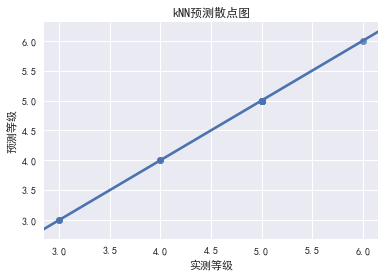

In [26]:
sns.regplot(np.asarray(levels), y_pred_knn.flatten())
plt.title('kNN预测散点图')
plt.xlabel('实测等级')
plt.ylabel('预测等级')

In [27]:
print('PSLR模型决定系数为 {}'.format(round(r2_score(levels, y_pred_knn),2)))

PSLR模型决定系数为 1.0


todo 欧氏距离